# Data Science for Competitive Improvement in League of Legends
## Final Project – Analysis Notebook

**Student:** Andrew Laurence T. Fat  
**Role:** Top Lane


## 1. Data Loading & Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load match data (replace filename with your exported Riot API CSV)
df = pd.read_csv('combine.csv')

# Preview data
df.head()

,match_id,game_mode,game_start_timestamp,game_start_date,game_end_date,game_duration,champion,position,kills,deaths,...,gold_earned,cs,cs_per_minute,damage_dealt,damage_taken,damage_objectives,damage_towers,damage_dragons_estimated,damage_per_minute,win
0,SG2_112279566,Ranked Flex,1763218348853,2025-11-15 14:52:28,2025-11-15 15:18:51,1583,Hwei,MIDDLE,6,5,...,10914,155,5.87,28577,19751,775,0,775,1083.15,False
1,SG2_112216447,Ranked Flex,1763201148284,2025-11-15 10:05:48,2025-11-15 10:33:01,1633,Volibear,JUNGLE,12,3,...,12882,149,5.47,15767,30843,43427,3551,39876,579.31,True
2,SG2_112207340,Ranked Flex,1763198358470,2025-11-15 09:19:18,2025-11-15 09:58:17,2339,KSante,TOP,8,3,...,16760,227,5.82,31086,48018,9486,2852,6634,797.42,True
3,SG2_112091320,Normal Draft,1763137563769,2025-11-14 16:26:03,2025-11-14 16:53:22,1639,Velkoz,UTILITY,5,5,...,9526,30,1.10,28080,14903,3655,2471,1184,1027.94,True
4,SG2_112084244,Normal Draft,1763135906952,2025-11-14 15:58:26,2025-11-14 16:20:07,1301,Thresh,UTILITY,2,4,...,6414,21,0.97,7352,14658,632,632,0,339.06,False


## 2. Data Cleaning

In [2]:
# Remove remake games (under 5 minutes)
df = df[df['game_duration'] >= 300]

# Convert win column to binary
df['win'] = df['win'].astype(int)

# Create KDA safely
df['kda'] = (df['kills'] + df['assists']) / df['deaths'].replace(0, 1)

# CS per minute
df['cs_per_min'] = df['cs'] / (df['game_duration'] / 60)

df.describe()

,game_start_timestamp,game_duration,kills,deaths,assists,KDA,gold_earned,cs,cs_per_minute,damage_dealt,damage_taken,damage_objectives,damage_towers,damage_dragons_estimated,damage_per_minute,win,kda,cs_per_min
count,3.990000e+02,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,1.765292e+12,1846.573935,4.719298,5.761905,10.080201,3.562556,11318.283208,150.972431,4.864612,21838.473684,32907.729323,10659.353383,3815.115288,6844.238095,692.241028,0.508772,3.562523,4.864863
std,2.917802e+09,414.556400,3.961042,2.986730,7.230142,3.503155,3378.746402,75.416843,2.176431,12386.486650,15840.797705,10741.097422,3725.184132,9933.053423,319.586025,0.500551,3.503181,2.176323
min,1.759050e+12,461.000000,0.000000,0.000000,0.000000,0.000000,1763.000000,9.000000,0.450000,448.000000,1065.000000,0.000000,0.000000,0.000000,58.310000,0.000000,0.000000,0.447761
25%,1.763043e+12,1617.500000,2.000000,3.000000,5.000000,1.500000,9288.000000,111.500000,4.490000,13225.500000,22366.000000,3488.000000,880.500000,1065.500000,472.810000,0.000000,1.500000,4.491222
50%,1.765489e+12,1835.000000,4.000000,6.000000,9.000000,2.500000,10973.000000,168.000000,5.470000,20686.000000,31322.000000,7577.000000,2748.000000,3491.000000,669.610000,1.000000,2.500000,5.474587
75%,1.767965e+12,2113.000000,7.000000,8.000000,13.000000,4.330000,13270.000000,203.000000,6.285000,28681.500000,41645.500000,13978.500000,5691.500000,7841.500000,878.130000,1.000000,4.333333,6.284161
max,1.769787e+12,3307.000000,32.000000,19.000000,41.000000,23.000000,26503.000000,340.000000,8.810000,109156.000000,165606.000000,62309.000000,21564.000000,56573.000000,2533.600000,1.000000,23.000000,8.813115


In [10]:
# Filter Ranked Solo/Duo TOP games
df = df[(df['game_mode'] == 'Ranked Solo/Duo') & (df['position'] == 'TOP')]

In [11]:
df.tail()

,match_id,game_mode,game_start_timestamp,game_start_date,game_end_date,game_duration,champion,position,kills,deaths,...,damage_taken,damage_objectives,damage_towers,damage_dragons_estimated,damage_per_minute,win,kda,cs_per_min,game_date,period
403,SG2_130663961,Ranked Solo/Duo,1769356871670,2026-01-25 16:01:11,2026-01-25 16:39:23,2292,Sion,TOP,2,7,...,60753,15929,8711,7218,788.17,0,2.857143,7.905759,2026-01-25 16:01:11,After
404,SG2_130431452,Ranked Solo/Duo,1769277582019,2026-01-24 17:59:42,2026-01-24 18:39:33,2391,Ambessa,TOP,2,11,...,48449,5685,4083,1602,471.29,0,0.818182,4.742785,2026-01-24 17:59:42,After
405,SG2_130420776,Ranked Solo/Duo,1769275586535,2026-01-24 17:26:26,2026-01-24 17:55:23,1737,Aatrox,TOP,11,1,...,31711,14245,9306,4939,1149.36,1,19.000000,7.564767,2026-01-24 17:26:26,After
406,SG2_130412159,Ranked Solo/Duo,1769273216649,2026-01-24 16:46:56,2026-01-24 17:19:31,1955,Gnar,TOP,4,7,...,43685,9461,6086,3375,1112.07,0,1.285714,5.892583,2026-01-24 16:46:56,After
407,SG2_130397306,Ranked Solo/Duo,1769270293972,2026-01-24 15:58:13,2026-01-24 16:39:45,2492,Pantheon,TOP,7,7,...,43715,9344,7463,1881,838.84,1,2.714286,5.513644,2026-01-24 15:58:13,After


## 3. Period Labeling (Before vs After)

In [13]:
# Convert game date
df['game_date'] = pd.to_datetime(df['game_start_date'], errors='coerce')

# Period split (Before/After research start date)
research_start = pd.Timestamp("2025-11-16")
df['period'] = np.where(df['game_date'] < research_start, 'Before', 'After')

df['period'].value_counts()

,count
period,
After,163
Before,22


## 4. Descriptive Statistics Comparison

In [20]:
metrics = ['cs_per_minute', 'KDA', 'gold_earned', 'damage_dealt', 'cs', 'damage_taken']

df.groupby('period')[metrics + ['win']].mean()

,cs_per_minute,KDA,gold_earned,damage_dealt,cs,damage_taken,win
period,,,,,,,
After,6.075399,3.303313,11441.889571,23286.907975,185.288344,33528.595092,0.496933
Before,5.846818,2.992273,11844.363636,21608.318182,182.772727,35104.727273,0.409091


## 5. Visualization of Improvement

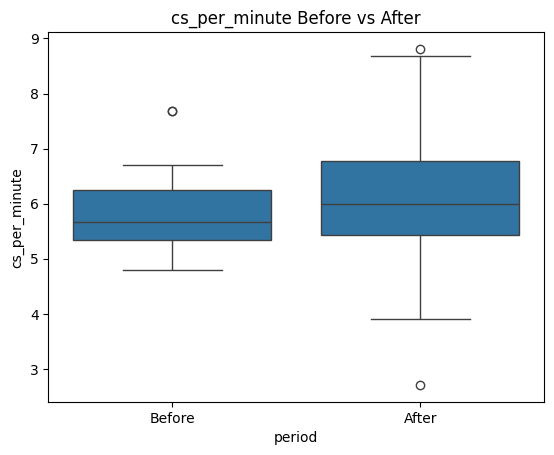

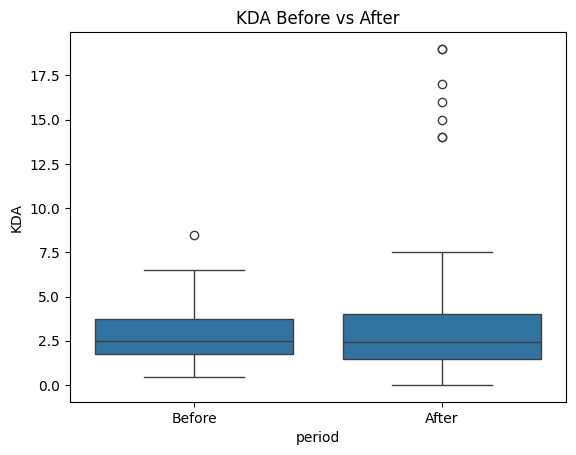

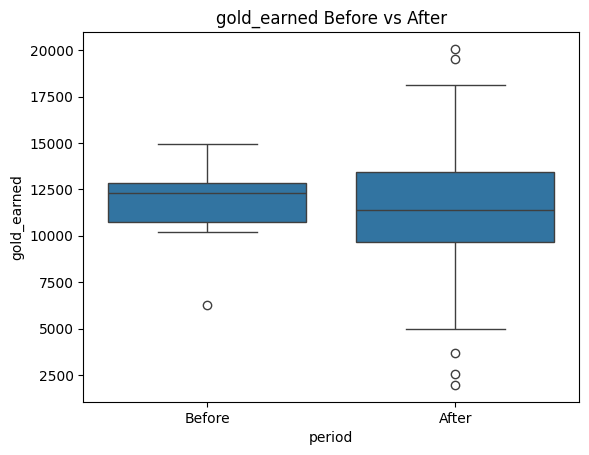

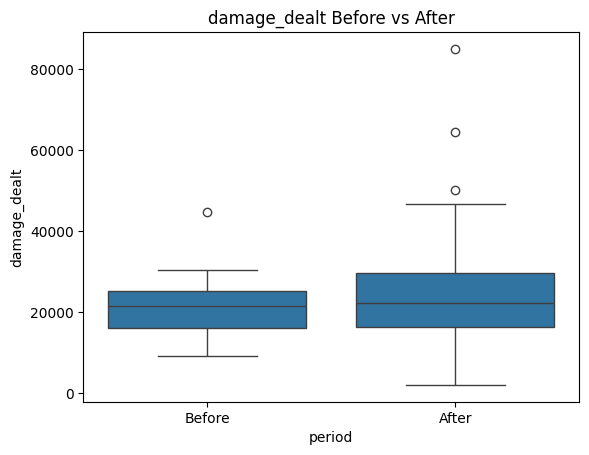

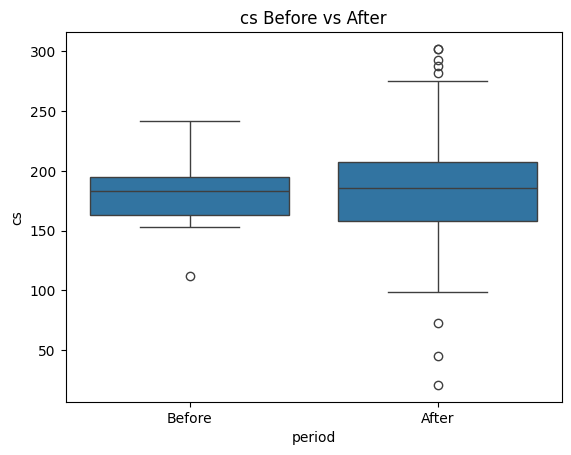

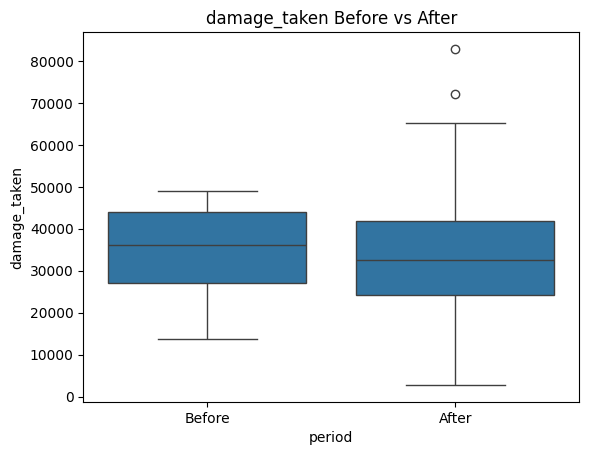

In [21]:
for metric in metrics:
    sns.boxplot(data=df, x='period', y=metric)
    plt.title(f'{metric} Before vs After')
    plt.show()

## 6. Correlation Analysis

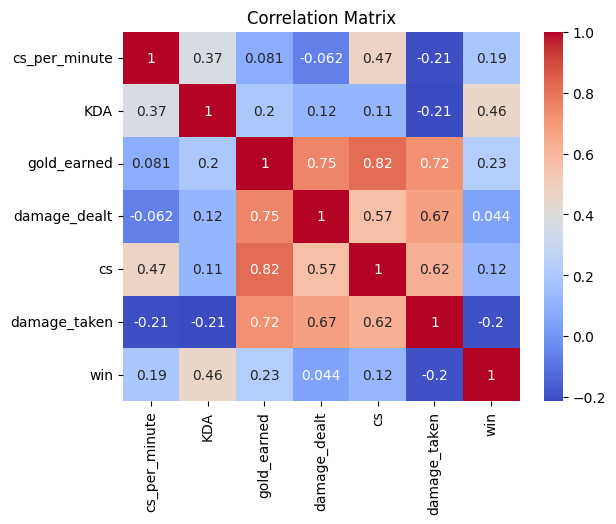

In [22]:
corr = df[metrics + ['win']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 7. Hypothesis Testing (T-Test)

In [32]:
from scipy.stats import ttest_ind

alpha = 0.05  # significance level
# Metrics explicitly stated in the proposal
hypothesis_metrics = {
    "Win Rate": "win",
    "CS per Minute": "cs_per_minute",
    "KDA": "KDA",
    "Gold Earned": "gold_earned",
    "Damage Dealt": "damage_dealt",
    "CS": "cs",
    "Damage Taken": "damage_taken"
}

results = []

for metric_name, column in hypothesis_metrics.items():
    before = df[df['period'] == 'Before'][column]
    after = df[df['period'] == 'After'][column]

    # Welch's t-test (two-tailed)
    t_stat, p_two_tailed = ttest_ind(
        after, before, equal_var=False, nan_policy='omit'
    )

    # Convert to one-tailed test (After > Before)
    if t_stat > 0:
        p_one_tailed = p_two_tailed / 2
    else:
        p_one_tailed = 1.0

    decision = (
        "Reject H₀ (Significant Improvement)"
        if p_one_tailed < alpha
        else "Fail to Reject H₀"
    )

    results.append({
        "Metric": metric_name,
        "Mean Before": before.mean(),
        "Mean After": after.mean(),
        "t-statistic": t_stat,
        "p-value (one-tailed)": p_one_tailed,
        "Decision": decision
    })

# Display results table
hypothesis_results = pd.DataFrame(results)
hypothesis_results

,Metric,Mean Before,Mean After,t-statistic,p-value (one-tailed),Decision
0,Win Rate,0.409091,0.496933,0.768816,0.224345,Fail to Reject H₀
1,CS per Minute,5.846818,6.075399,1.209553,0.118002,Fail to Reject H₀
2,KDA,2.992273,3.303313,0.613781,0.271529,Fail to Reject H₀
3,Gold Earned,11844.363636,11441.889571,-0.910178,1.000000,Fail to Reject H₀
4,Damage Dealt,21608.318182,23286.907975,0.917459,0.182740,Fail to Reject H₀
5,CS,182.772727,185.288344,0.345023,0.366108,Fail to Reject H₀
6,Damage Taken,35104.727273,33528.595092,-0.656015,1.000000,Fail to Reject H₀


## 8. Champion Specialization Analysis

In [24]:
# Champion frequency
champion_counts = df['champion'].value_counts()

champion_counts.head(10)

,count
champion,
Ambessa,42
Aatrox,26
Pantheon,23
Gnar,19
Sion,19
KSante,13
Ornn,13
Volibear,12
Kled,6


## 9. Win Prediction Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[metrics]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.7021276595744681


## 10. Conclusion

The analysis evaluates measurable improvement in Top Lane performance. Statistical tests and predictive modeling determine whether post-period performance metrics significantly exceed pre-period results and better explain match outcomes.